**Loading Dataset**

In [8]:
import pandas as pd

In [9]:
dataset = pd.read_csv("Dataset/Training.csv")
testing_dataset = pd.read_csv("Dataset/Testing.csv")

In [10]:
dataset.shape

(4920, 133)

**Train Test split**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
# X_train = dataset.drop("prognosis", axis=1)
# y_train = dataset["prognosis"]
# X_test = testing_dataset.drop("prognosis", axis=1)
# y_test = testing_dataset['prognosis']

X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("prognosis", axis = 1),
    dataset["prognosis"],
    test_size = 0.2
)

In [15]:
testing_dataset.shape

(42, 133)

In [16]:
y_train

3403        Fungal infection
2878         Gastroenteritis
2972             Hepatitis B
2047                Impetigo
3814                 Allergy
                ...         
4850    Cervical spondylosis
4063           Drug Reaction
4020                    GERD
3221             Hepatitis E
1247                 Allergy
Name: prognosis, Length: 3936, dtype: object

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3936, 132), (984, 132), (3936,), (984,))

**Training Model**

SVC accuracy:1.0
SVC Confusion Matrix:
[[28,  0,  0, ...,  0,  0,  0],
 [ 0, 26,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 34,  0],
 [ 0,  0,  0, ...,  0,  0, 30]]
RandomForest accuracy:1.0
RandomForest Confusion Matrix:
[[28,  0,  0, ...,  0,  0,  0],
 [ 0, 26,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 34,  0],
 [ 0,  0,  0, ...,  0,  0, 30]]
KNeighbors accuracy:1.0
KNeighbors Confusion Matrix:
[[28,  0,  0, ...,  0,  0,  0],
 [ 0, 26,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 34,  0],
 [ 0,  0,  0, ...,  0,  0, 30]]


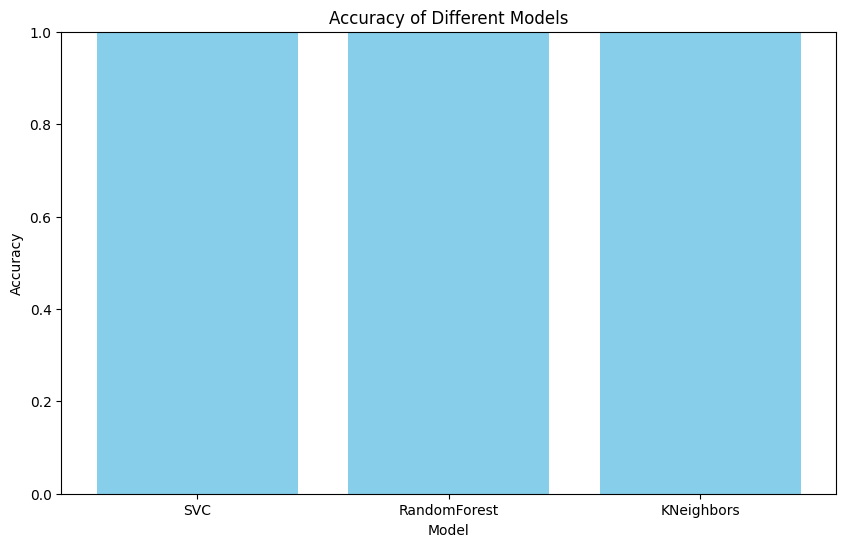

In [18]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
model_accuracies = {}
models = {
    "SVC":SVC(kernel = "linear"),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNeighbors":KNeighborsClassifier(n_neighbors=5)
}
for model_name, model in models.items():
    #training the model
    model.fit(X_train, y_train)
    #testing it
    predictions = model.predict(X_test)
    #calculating Accuracy
    accuracy = accuracy_score(y_test,predictions)
    model_accuracies[model_name] = accuracy
    #confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} accuracy:{accuracy}")
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim([0, 1]) 
plt.show()

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
accuracy_score(y_test, ypred)

0.9761904761904762

In [38]:
import pickle
pickle.dump(rf, open("Models/rf.pkl",'wb'))

In [39]:
rf = pickle.load(open("Models/rf.pkl",'rb'))

In [40]:
print("Predicted label: ", rf.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual label: ", y_test[0])

Predicted label:  ['Fungal infection']
Actual label:  Fungal infection


C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
sym_des = pd.read_csv('Dataset/symtoms_df.csv')
precautions = pd.read_csv('Dataset/precautions_df.csv')
workout = pd.read_csv("Dataset/workout_df.csv")
description = pd.read_csv("Dataset/description.csv")
medications = pd.read_csv("Dataset/medications.csv")
diets = pd.read_csv("Dataset/diets.csv")

In [42]:
def helper(disease):
    descr = description[description['Disease'] == disease]['Description']
    descr = " ".join([w for w in descr])

    pre = precautions[precautions['Disease'] == disease][['Precaution_1','Precaution_2','Precaution_3','Precaution_2']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == disease]['Medication']
    med = [med for med in med.values]

    dt = diets[diets['Disease'] == disease]['Diet']
    dt = [dt for dt in dt.values]

    wrk = workout[workout['disease'] == disease]['workout']
    return descr, pre, med, dt, wrk
symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
def predict_val(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return rf.predict([input_vector])[0]

In [43]:
symptoms = input("Enter your symptoms: ")
user_symptoms = [s.strip() for s in symptoms.split(',')]
user_symptoms = [sym.strip("[]' ") for sym in user_symptoms]
predicted_disease = predict_val(user_symptoms)
print("Predicted disease: ", predicted_disease)
descr, pre, med, dt, wrk  = helper(predicted_disease)
print("-----Description------ \n")
print(descr)
print("-----Precaution------- \n")
i=1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i+=1
print("-----Medication------- \n")
print(med)
print("-----Diet-----")
print(dt)
print('------Workout----')
print(wrk)

Enter your symptoms:  itching


Predicted disease:  Fungal infection
-----Description------ 

Fungal infection is a common skin condition caused by fungi.
-----Precaution------- 

1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use detol or neem in bathing water
-----Medication------- 

["['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']"]
-----Diet-----
["['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']"]
------Workout----
0           Avoid sugary foods
1           Consume probiotics
2    Increase intake of garlic
3       Include yogurt in diet
4        Limit processed foods
5                Stay hydrated
6            Consume green tea
7       Eat foods rich in zinc
8     Include turmeric in diet
9    Eat fruits and vegetables
Name: workout, dtype: object


C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
with open("rf.pkl", "wb") as file:
    pickle.dump(rf, file)

In [45]:
# Load the saved model
with open("rf.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Test the loaded model
test_prediction = loaded_model.predict(X_test)
print("Loaded model accuracy:", accuracy_score(y_test, test_prediction))


Loaded model accuracy: 0.9761904761904762
